

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene
from scipy.stats import ttest_ind

In [2]:
df_trips=pd.read_csv('/datasets/project_sql_result_01.csv')
df_trips.info()
print(df_trips.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
0


In [3]:
df_location=pd.read_csv('/datasets/project_sql_result_04.csv')
df_location.info()
print(df_location.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
0


In [4]:
#Os valores esão corretos, nao existem valores nulos e nem duplicados.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


In [5]:
df_location_top10 = df_location.sort_values('average_trips', ascending=False).head(10)
print(df_location_top10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


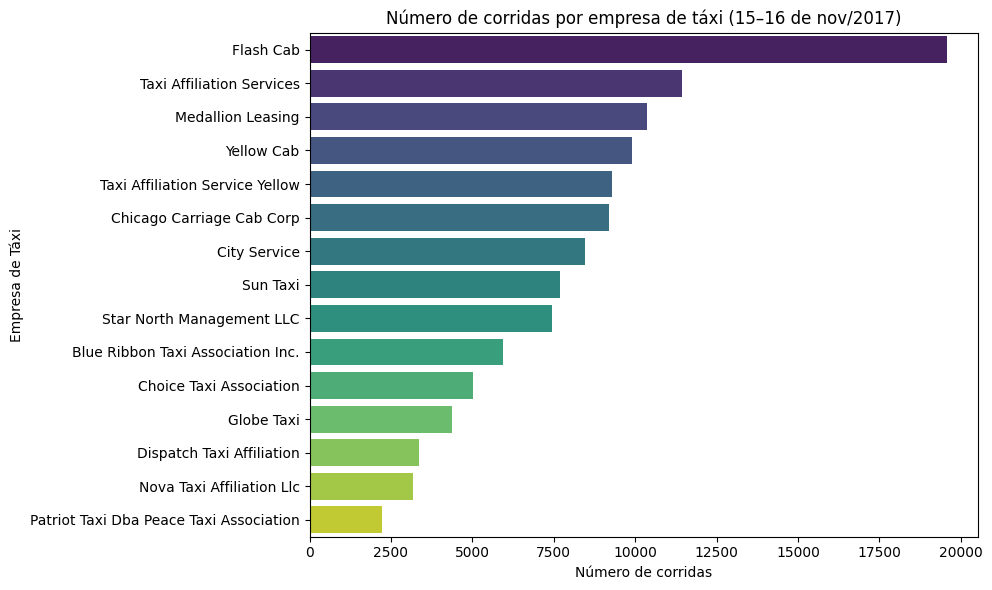

In [6]:
df_trips_top10 = df_trips.sort_values('trips_amount', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_trips_top10.sort_values('trips_amount', ascending=False),
    x='trips_amount', y='company_name', palette='viridis'
)
plt.title('Número de corridas por empresa de táxi (15–16 de nov/2017)')
plt.xlabel('Número de corridas')
plt.ylabel('Empresa de Táxi')
plt.tight_layout()
plt.show()

In [7]:
#As Empresas de taxi que mais realizam corridas são  Flash Cab, taxi affiliation services e Medallion Leasing.

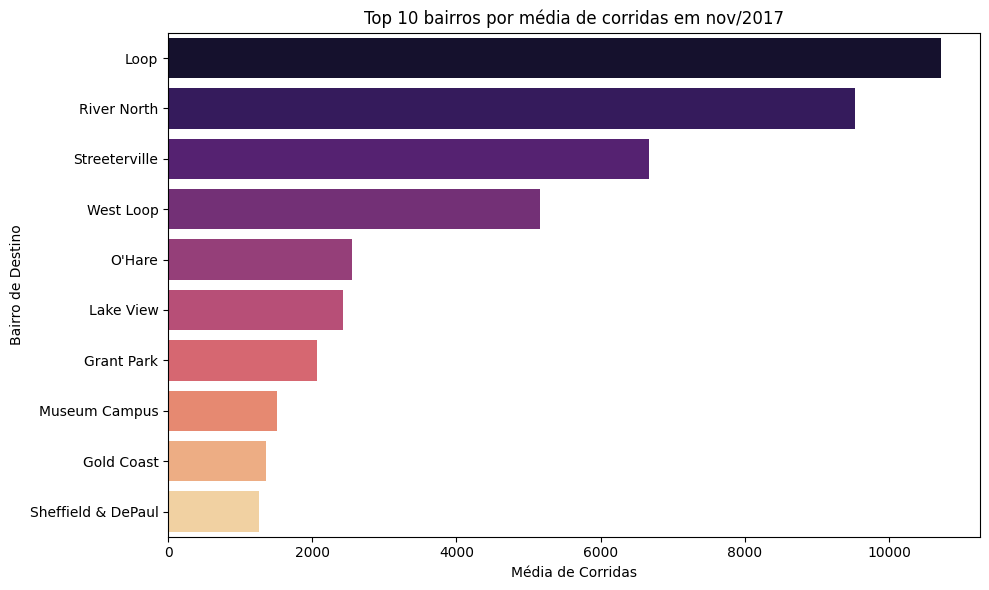

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_location_top10,
    x='average_trips', y='dropoff_location_name', palette='magma'
)
plt.title('Top 10 bairros por média de corridas em nov/2017')
plt.xlabel('Média de Corridas')
plt.ylabel('Bairro de Destino')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ambas as visualizações foram implementadas conforme o solicitado e permitem ver com clareza os itens que se destacam em cada uma das dimensões.
</div>



In [9]:
# Os destinos mais procurados são Loop, River North e Streeterville. 

In [10]:
# As tabelas nao possuem uma chave direta para uma analise mais detalhada.

In [11]:
df_loop=pd.read_csv('/datasets/project_sql_result_07.csv')
df_loop.info()
print(df_loop.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
197


In [12]:
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'])
df_loop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [13]:
#Hipotese nula: Dias de chuva não afetam a duração das corridas.
#Hipotese alternativa: Dias de chuva afetam a duração das corridas.
# alpha= 0.05 por ser o mais usado em estudos.

In [15]:
df_loop['dia']=df_loop['start_ts'].dt.weekday
df_loop=df_loop[df_loop['dia']==5]
df_loop

,start_ts,weather_conditions,duration_seconds,dia
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [20]:
df_bad=df_loop[df_loop['weather_conditions']=='Bad']
df_good=df_loop[df_loop['weather_conditions']=='Good']


In [30]:
s_stat, p_levene =levene(df_bad['duration_seconds'],df_good['duration_seconds'])
print('levene:', s_stat)
print('p_levene:', p_levene)
equal_var=p_levene>0.05
t_stat, p_value=ttest_ind(df_bad['duration_seconds'],df_good['duration_seconds'],equal_var=equal_var)
print('t', t_stat, 'p', p_value)

levene: 0.38853489683656073
p_levene: 0.5332038671974493
t 6.946177714041499 p 6.517970327099473e-12


In [32]:
# p_valor é bem mais baixo que 0.05, que foi o valor de alpha definido. 
#Portanto, existe diferença significativas na duração da viagens em dias chuvosos e ensolarados.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

O teste foi formulado, implementado e analisado corretamente. Muito bom!
</div>

